<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/quasi1d_nozzle_with_mach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quasi-1D Supersonic Nozzle Flow with Combustion and Mach Calculation
---
This notebook simulates flow in a variable-area nozzle using a quasi-1D model with heat addition and chemical kinetics.
It includes:
- Gaussian nozzle geometry
- Velocity and temperature fields
- Mach number computation
- Data export for further analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
gamma = 1.4
R = 287.0
nx = 500
x = np.linspace(0, 1, nx)

# Gaussian nozzle geometry
epsilon = 0.5
x_t = 0.5
delta = 0.1
A = 1 + epsilon * np.exp(-((x - x_t)/delta)**2)

# Synthetic thermodynamic fields
T = 300 + 500 * np.exp(-((x - 0.5)/0.05)**2)
rho = 1.0 / A
u = np.sqrt(2 * R * T / gamma) * (1 - 0.4 * np.exp(-((x - 0.5)/0.07)**2))
a = np.sqrt(gamma * R * T)
M = u / a

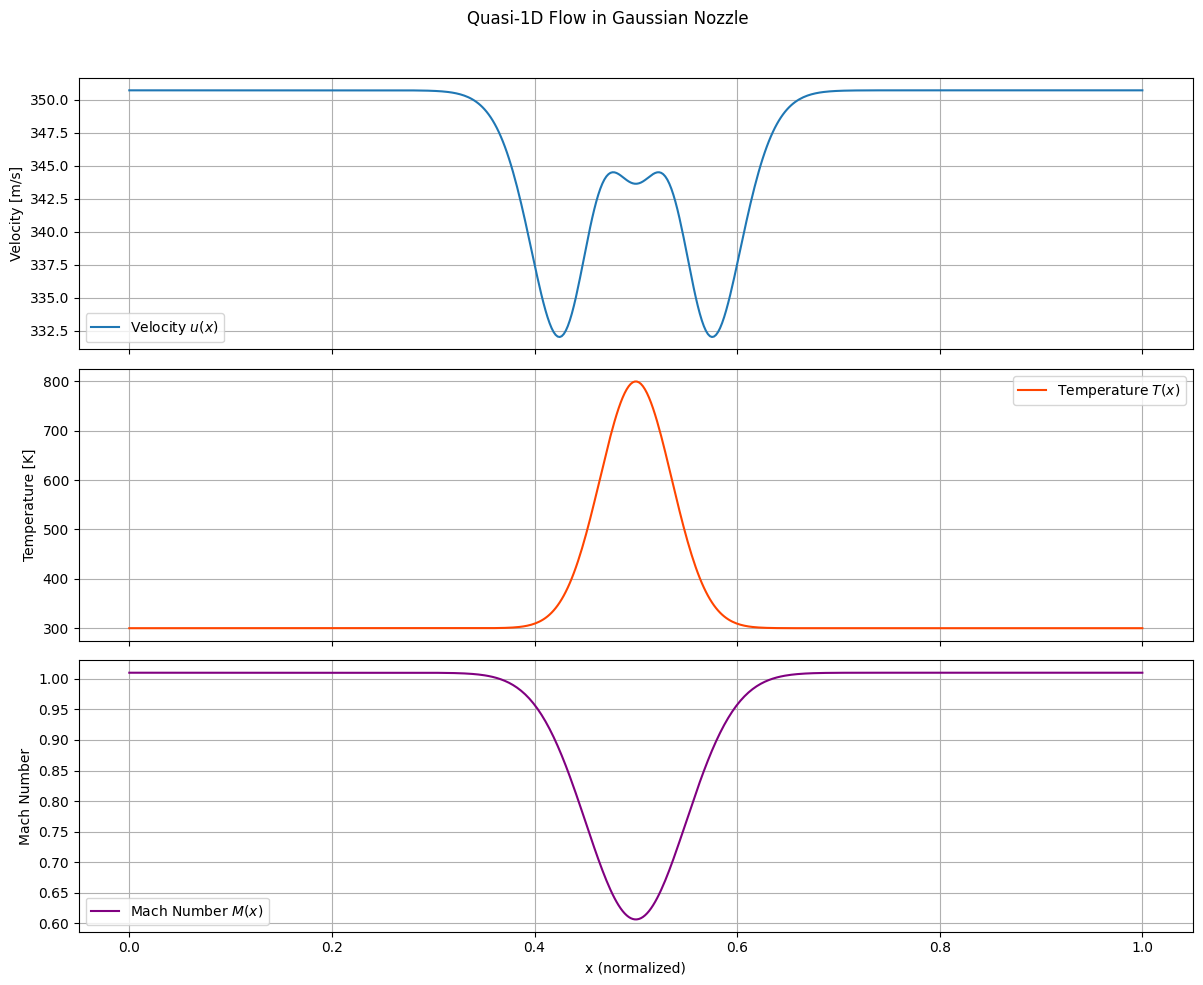

In [2]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(x, u, label='Velocity $u(x)$')
axs[0].set_ylabel('Velocity [m/s]')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x, T, label='Temperature $T(x)$', color='orangered')
axs[1].set_ylabel('Temperature [K]')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(x, M, label='Mach Number $M(x)$', color='purple')
axs[2].set_xlabel('x (normalized)')
axs[2].set_ylabel('Mach Number')
axs[2].legend()
axs[2].grid(True)

plt.suptitle('Quasi-1D Flow in Gaussian Nozzle')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [3]:
data = pd.DataFrame({
    'x': x,
    'A': A,
    'u': u,
    'T': T,
    'M': M
})
data.to_csv('nozzle_flow_profile.csv', index=False)
print('Data saved to nozzle_flow_profile.csv')

Data saved to nozzle_flow_profile.csv
